In [2]:
# Tratamiento base de datos
import pandas as pd
import numpy as np

# PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Gráficos
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# pd.set_option('display.max_columns', None)

# Principal Component Analysis

In [3]:
df = pd.read_csv('datos\CrudeDatos2.csv')
df['tendencia'] = df['tendencia'].astype("category")

In [4]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('reducer', PCA())])

## Bids

In [5]:
pcaModel = pd.DataFrame(pipe.fit_transform(df.iloc[:,  2:32]))

In [6]:
# Porcentaje de varianza
var = pipe['reducer'].explained_variance_ratio_.cumsum() * 100
inc = np.diff(np.insert(var / 100, 0, 0))

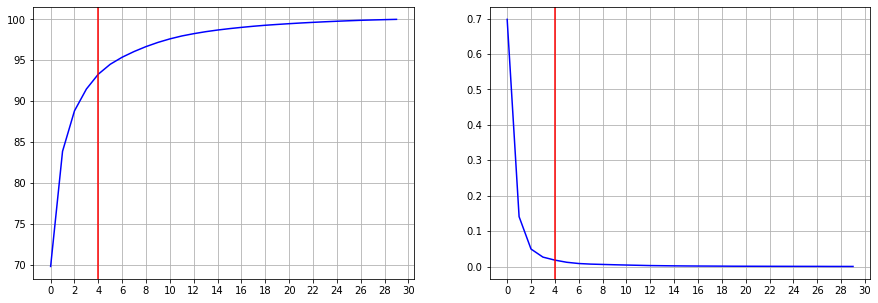

In [7]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(var, c = 'blue')
axs[0].axvline(x = 4, c = 'red')
axs[0].grid()
axs[0].set_xticks(np.arange(0, 31, 2))

axs[1].plot(inc, c = 'blue')
axs[1].axvline(x = 4, c = 'red')
axs[1].grid()
axs[1].set_xticks(np.arange(0, 31, 2));

In [8]:
# Ponderación
ldg1 = pd.DataFrame(
    data = pipe['reducer'].components_,
    columns = df.iloc[:, 2:32].columns
    ).iloc[0:4, :]

ldg1

,bid0.1,bid0.2,bid0.3,bid0.4,bid0.5,bid0.6,bid0.7,bid0.8,bid0.9,bid1.0,...,bid2.6,bid2.8,bid3.0,bid3.2,bid3.6,bid4.0,bid4.4,bid4.8,bid5.4,bid6.0
0,0.097088,0.132459,0.149790,0.153330,0.160310,0.169824,0.178063,0.183827,0.188659,0.192714,...,0.197362,0.195836,0.194966,0.193529,0.190056,0.186297,0.181140,0.173428,0.156129,0.134552
1,0.212186,0.248157,0.247652,0.248637,0.239978,0.224263,0.207031,0.190514,0.170132,0.150194,...,-0.148043,-0.167264,-0.177803,-0.186683,-0.203268,-0.215554,-0.230781,-0.243958,-0.266352,-0.278357
2,0.381338,0.354666,0.301444,0.248398,0.176300,0.088303,0.014077,-0.042310,-0.094203,-0.136663,...,-0.032823,0.003267,0.025446,0.046923,0.084900,0.121830,0.156215,0.195650,0.229650,0.249432
3,0.487593,0.267027,0.098433,-0.064528,-0.180242,-0.239400,-0.244836,-0.227701,-0.196310,-0.153420,...,0.174320,0.148687,0.123083,0.092543,0.020671,-0.041927,-0.095398,-0.165455,-0.243506,-0.299783


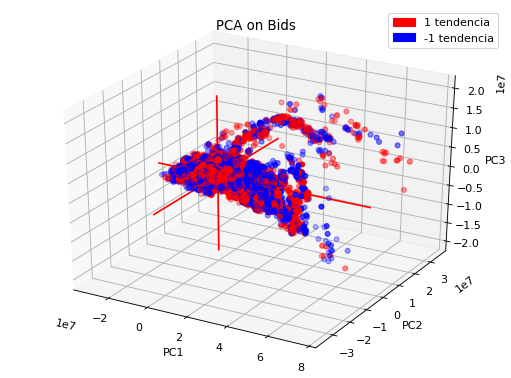

In [9]:
dfBids = df.iloc[:, 2:32]

pca = PCA(n_components = 3)
pca.fit(dfBids)
my_color = df['tendencia'].cat.codes

result1 = pd.DataFrame(pca.transform(dfBids), columns=['PCA%i' % i for i in range(1, 4)], index = dfBids.index)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(result1['PCA1'], result1['PCA2'], result1['PCA3'], c = my_color, cmap="bwr", s = 20)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result1['PCA1']), max(result1['PCA1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(result1['PCA2']), max(result1['PCA2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0, 0), (min(result1['PCA3']), max(result1['PCA3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Bids")

# Legend
red_patch = mpatches.Patch(color='red', label= '1 tendencia')
blue_patch = mpatches.Patch(color='blue', label= '-1 tendencia')
plt.legend(handles=[red_patch, blue_patch])

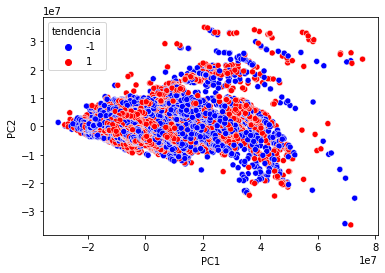

In [10]:
df2d = pd.DataFrame({'PC1': result1['PCA1'],
                     'PC2': result1['PCA2'],
                     'tendencia': df['tendencia']})

sns.scatterplot(data = df2d,
                x = 'PC1', y = 'PC2',
                hue = 'tendencia',
                palette=["blue", "red"],
                alpha = 1)

## Asks

In [11]:
pcaModel = pd.DataFrame(pipe.fit_transform(df.iloc[:, 54:84]))

In [12]:
# Porcentaje de varianza
var = pipe['reducer'].explained_variance_ratio_.cumsum() * 100
inc = np.diff(np.insert(var / 100, 0, 0))

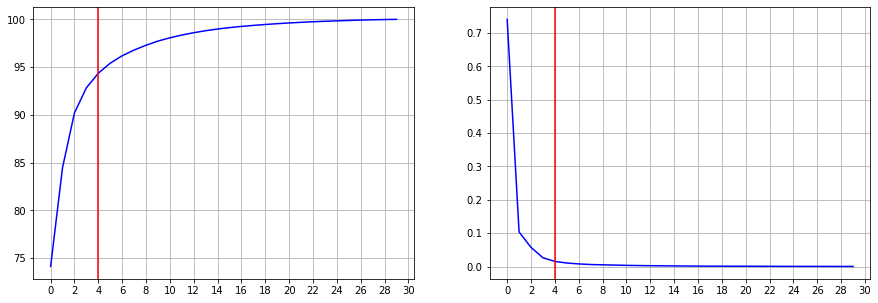

In [13]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(var, c = 'blue')
axs[0].axvline(x = 4, c = 'red')
axs[0].grid()
axs[0].set_xticks(np.arange(0, 31, 2))

axs[1].plot(inc, c = 'blue')
axs[1].axvline(x = 4, c = 'red')
axs[1].grid()
axs[1].set_xticks(np.arange(0, 31, 2));

In [14]:
# Ponderación
ldg2 = pd.DataFrame(
    data = pipe['reducer'].components_,
    columns = df.iloc[:, 54:84].columns
    ).iloc[0:4, :]

ldg2

,ask0.1,ask0.2,ask0.3,ask0.4,ask0.5,ask0.6,ask0.7,ask0.8,ask0.9,ask1.0,...,ask2.6,ask2.8,ask3.0,ask3.2,ask3.6,ask4.0,ask4.4,ask4.8,ask5.4,ask6.0
0,0.107686,0.137156,0.154784,0.158214,0.163309,0.171105,0.177066,0.180776,0.183342,0.186192,...,0.196719,0.196135,0.195025,0.193465,0.189950,0.186908,0.184409,0.183058,0.180260,0.175650
1,0.186232,0.221337,0.217402,0.232669,0.243214,0.236172,0.228865,0.217120,0.202698,0.181314,...,-0.149444,-0.169946,-0.185793,-0.198844,-0.217258,-0.227603,-0.229374,-0.228325,-0.230346,-0.236065
2,0.377732,0.379164,0.327115,0.262403,0.175678,0.086567,0.008648,-0.060737,-0.114932,-0.158979,...,-0.027781,0.010620,0.041784,0.066375,0.107156,0.135175,0.156002,0.158298,0.145300,0.128422
3,0.532113,0.301460,0.092976,-0.100143,-0.226845,-0.273094,-0.260337,-0.223609,-0.180961,-0.110671,...,0.099003,0.054420,0.013546,-0.012738,-0.054002,-0.093993,-0.132176,-0.150350,-0.165613,-0.164160


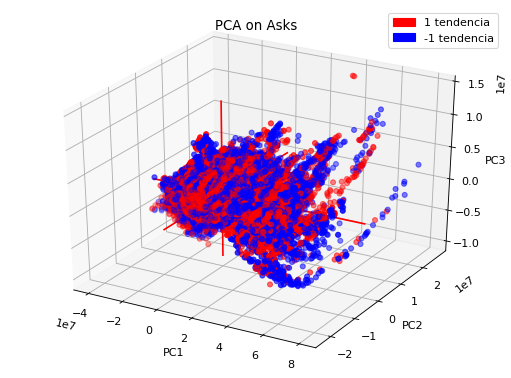

In [15]:
dfAsks = df.iloc[:, 54:84]

pca = PCA(n_components = 3)
pca.fit(dfAsks)

my_color = df['tendencia'].cat.codes

result2 = pd.DataFrame(pca.transform(dfAsks), columns=['PCA%i' % i for i in range(1, 4)], index = dfAsks.index)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(result2['PCA1'], result2['PCA2'], result2['PCA3'], c = my_color, cmap="bwr", s = 20)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result2['PCA1']), max(result2['PCA1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(result2['PCA2']), max(result2['PCA2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0, 0), (min(result2['PCA3']), max(result2['PCA3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Asks")

# Legend
red_patch = mpatches.Patch(color='red', label= '1 tendencia')
blue_patch = mpatches.Patch(color='blue', label= '-1 tendencia')
plt.legend(handles=[red_patch, blue_patch])

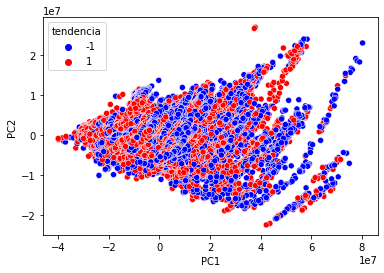

In [16]:
df2d = pd.DataFrame({'PC1': result2['PCA1'],
                     'PC2': result2['PCA2'],
                     'tendencia': df['tendencia']})

sns.scatterplot(data = df2d,
                x = 'PC1', y = 'PC2',
                hue = 'tendencia',
                palette=["blue", "red"],
                alpha = 1)

## BidSlope

In [17]:
pcaModel = pd.DataFrame(pipe.fit_transform(df.iloc[:, 34:49]))

In [18]:
# Porcentaje de varianza
var = pipe['reducer'].explained_variance_ratio_.cumsum() * 100
inc = np.diff(np.insert(var / 100, 0, 0))

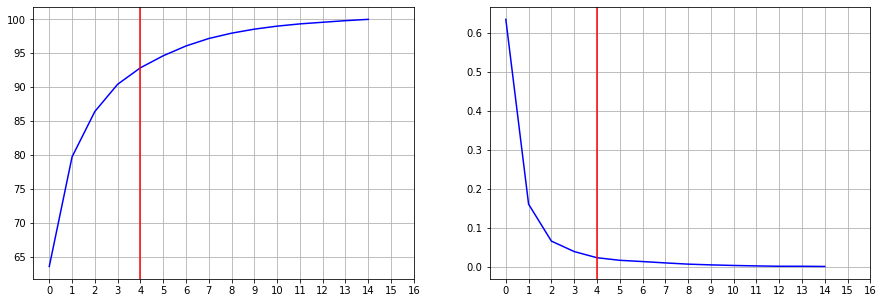

In [19]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(var, c = 'blue')
axs[0].axvline(x = 4, c = 'red')
axs[0].grid()
axs[0].set_xticks(np.arange(0, 17, 1))

axs[1].plot(inc, c = 'blue')
axs[1].axvline(x = 4, c = 'red')
axs[1].grid()
axs[1].set_xticks(np.arange(0, 17, 1));

In [20]:
# Ponderación
ldg3 = pd.DataFrame(
    data = pipe['reducer'].components_,
    columns = df.iloc[:, 34:49].columns
    ).iloc[0:4, :]

ldg3

,BidSlp0.1,BidSlp0.3,BidSlp0.5,BidSlp0.7,BidSlp0.9,BidSlp1.1,BidSlp1.3,BidSlp1.5,BidSlp1.8,BidSlp2.2,BidSlp2.6,BidSlp3.0,BidSlp3.6,BidSlp4.4,BidSlp5.4
0,0.102043,0.161811,0.194134,0.239605,0.265038,0.281414,0.291843,0.297256,0.300018,0.299101,0.292259,0.286655,0.278052,0.262223,0.228474
1,0.316055,0.402153,0.380474,0.311454,0.246089,0.178025,0.106923,0.047188,-0.031476,-0.128381,-0.202453,-0.239324,-0.273178,-0.304371,-0.328181
2,0.627091,0.386965,0.119028,-0.100535,-0.218089,-0.263340,-0.264352,-0.229496,-0.158777,-0.048488,0.052167,0.113178,0.164515,0.222835,0.271048
3,0.606176,-0.187875,-0.487810,-0.279001,-0.084301,0.106176,0.204764,0.245988,0.215166,0.133139,0.052400,-0.013778,-0.098483,-0.175174,-0.230854


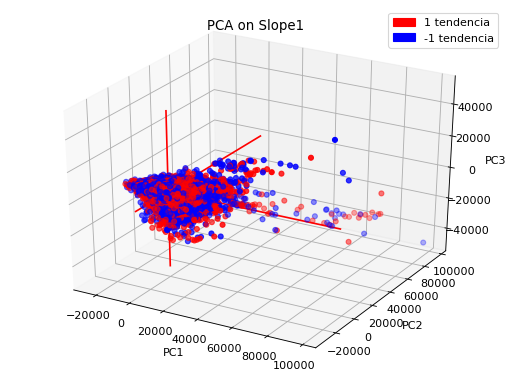

In [21]:
SlopeBid = df.iloc[:,34:49]

pca = PCA(n_components = 3)
pca.fit(SlopeBid)

my_color = df['tendencia'].cat.codes

result3 = pd.DataFrame(pca.transform(SlopeBid), columns=['PCA%i' % i for i in range(1, 4)], index = SlopeBid.index)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(result3['PCA1'], result3['PCA2'], result3['PCA3'], c = my_color, cmap="bwr", s = 20)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result3['PCA1']), max(result3['PCA1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(result3['PCA2']), max(result3['PCA2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0, 0), (min(result3['PCA3']), max(result3['PCA3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Slope1")

# Legend
red_patch = mpatches.Patch(color='red', label= '1 tendencia')
blue_patch = mpatches.Patch(color='blue', label= '-1 tendencia')
plt.legend(handles=[red_patch, blue_patch])

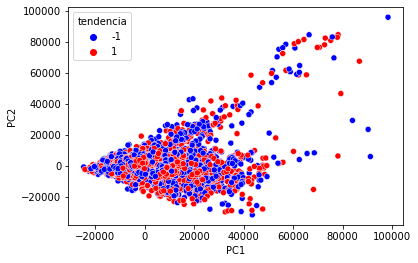

In [22]:
df2d = pd.DataFrame({'PC1': result3['PCA1'],
                     'PC2': result3['PCA2'],
                     'tendencia': df['tendencia']})

sns.scatterplot(data = df2d,
                x = 'PC1', y = 'PC2',
                hue = 'tendencia',
                palette=["blue", "red"],
                alpha = 1)

## AskSlope

In [23]:
pcaModel = pd.DataFrame(pipe.fit_transform(df.iloc[:, 86:101]))

In [24]:
# Porcentaje de varianza
var = pipe['reducer'].explained_variance_ratio_.cumsum() * 100
inc = np.diff(np.insert(var / 100, 0, 0))

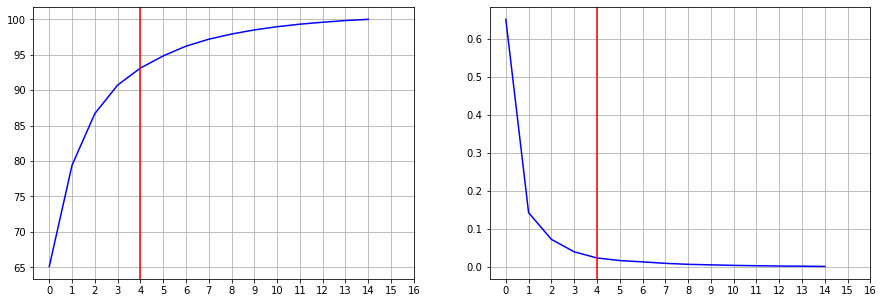

In [25]:
fig, axs = plt.subplots(1, 2, figsize = (15, 5))

axs[0].plot(var, c = 'blue')
axs[0].axvline(x = 4, c = 'red')
axs[0].grid()
axs[0].set_xticks(np.arange(0, 17, 1))

axs[1].plot(inc, c = 'blue')
axs[1].axvline(x = 4, c = 'red')
axs[1].grid()
axs[1].set_xticks(np.arange(0, 17, 1));

In [26]:
# Ponderación
ldg4 = pd.DataFrame(
    data = pipe['reducer'].components_,
    columns = df.iloc[:, 86:101].columns
    ).iloc[0:4, :]

ldg4

,AskSlp0.1,AskSlp0.3,AskSlp0.5,AskSlp0.7,AskSlp0.9,AskSlp1.1,AskSlp1.3,AskSlp1.5,AskSlp1.8,AskSlp2.2,AskSlp2.6,AskSlp3.0,AskSlp3.6,AskSlp4.4,AskSlp5.4
0,0.120358,0.179442,0.211347,0.244898,0.263150,0.276875,0.285024,0.289173,0.291580,0.291737,0.289292,0.284385,0.271957,0.258769,0.249579
1,0.312388,0.371556,0.357375,0.317851,0.262820,0.191253,0.116507,0.046255,-0.044299,-0.138845,-0.208202,-0.255005,-0.298972,-0.317716,-0.307089
2,0.575217,0.420096,0.152006,-0.071527,-0.211151,-0.275063,-0.286540,-0.257871,-0.193200,-0.068849,0.022479,0.106304,0.190226,0.242660,0.215949
3,0.617495,-0.096876,-0.457935,-0.319054,-0.140518,0.052889,0.182840,0.248166,0.251745,0.166254,0.082031,-0.016692,-0.105080,-0.185937,-0.191359


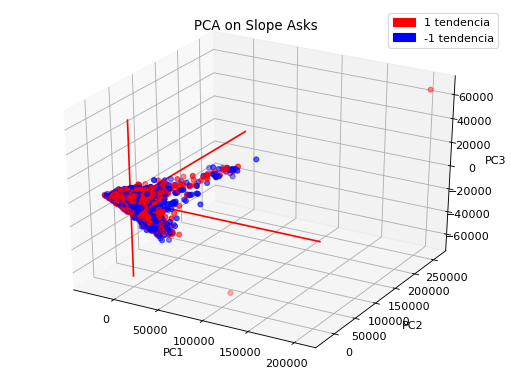

In [27]:
SlopeAsk = df.iloc[:, 86:101]

pca = PCA(n_components = 3)
pca.fit(SlopeAsk)

my_color = df['tendencia'].cat.codes

result4 = pd.DataFrame(pca.transform(SlopeAsk), columns=['PCA%i' % i for i in range(1, 4)], index = SlopeAsk.index)

fig = plt.figure(figsize=(8, 6), dpi=80)
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(result4['PCA1'], result4['PCA2'], result4['PCA3'], c = my_color, cmap="bwr", s = 20)
 
# make simple, bare axis lines through space:
xAxisLine = ((min(result4['PCA1']), max(result4['PCA1'])), (0, 0), (0, 0))
ax.plot(xAxisLine[0], xAxisLine[1], xAxisLine[2], 'r')

yAxisLine = ((0, 0), (min(result4['PCA2']), max(result4['PCA2'])), (0, 0))
ax.plot(yAxisLine[0], yAxisLine[1], yAxisLine[2], 'r')

zAxisLine = ((0, 0), (0, 0), (min(result4['PCA3']), max(result4['PCA3'])))
ax.plot(zAxisLine[0], zAxisLine[1], zAxisLine[2], 'r')
 
# label the axes
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("PCA on Slope Asks")

# Legend
red_patch = mpatches.Patch(color='red', label= '1 tendencia')
blue_patch = mpatches.Patch(color='blue', label= '-1 tendencia')
plt.legend(handles=[red_patch, blue_patch])

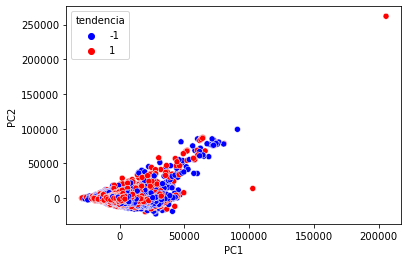

In [28]:
df2d = pd.DataFrame({'PC1': result4['PCA1'],
                     'PC2': result4['PCA2'],
                     'tendencia': df['tendencia']})

sns.scatterplot(data = df2d,
                x = 'PC1', y = 'PC2',
                hue = 'tendencia',
                palette=["blue", "red"],
                alpha = 1)

## Order Book canónicos

### OBC: Primera Componente

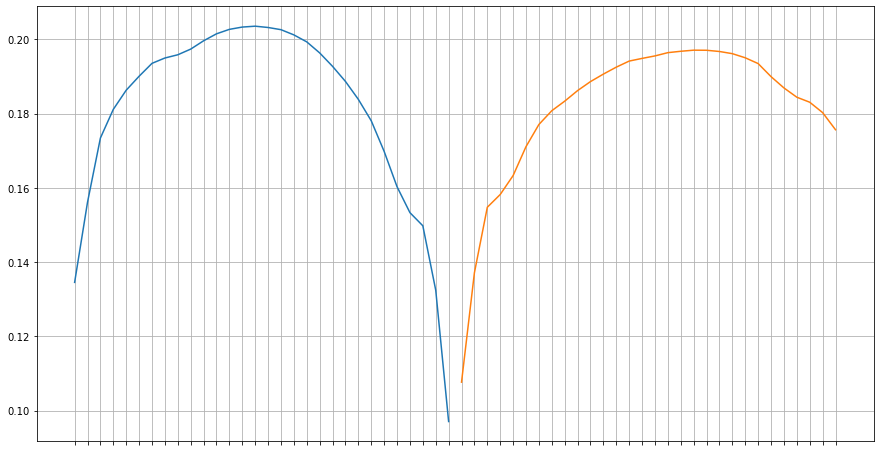

In [29]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(ldg1.iloc[0, :]))
ax.plot(ldg2.iloc[0, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Segunda Componente

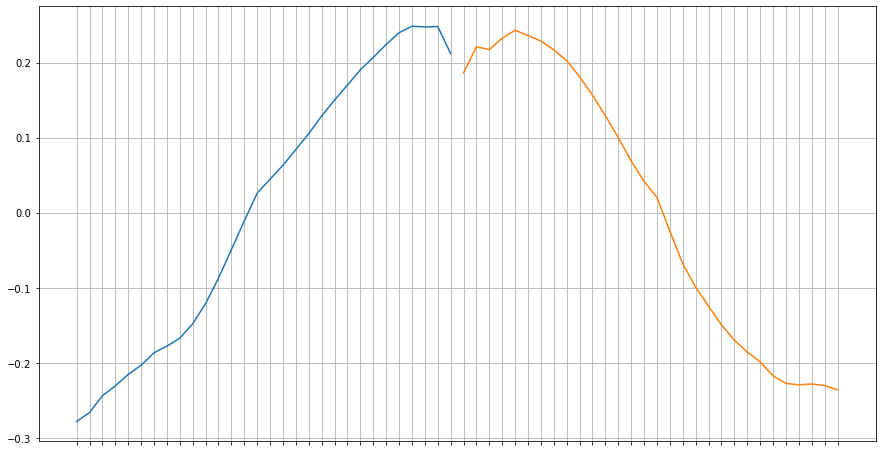

In [30]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(ldg1.iloc[1, :]))
ax.plot(ldg2.iloc[1, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Tercera Componente

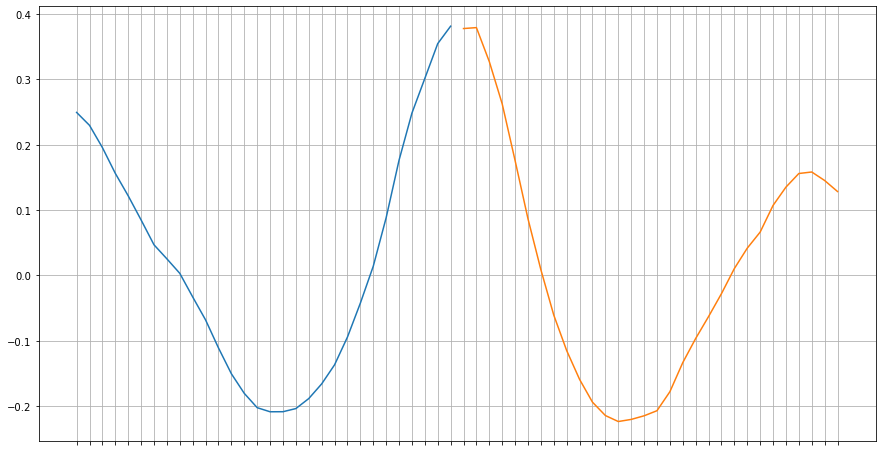

In [31]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(ldg1.iloc[2, :]))
ax.plot(ldg2.iloc[2, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Cuarta Componente

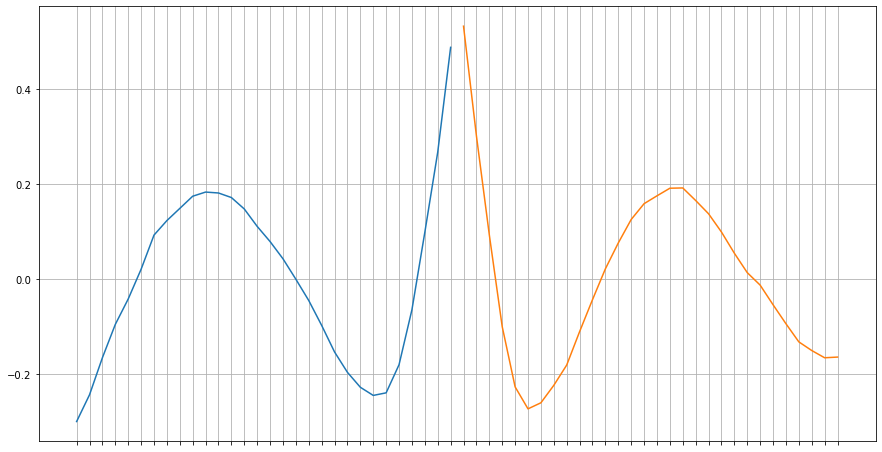

In [32]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(ldg1.iloc[3, :]))
ax.plot(ldg2.iloc[3, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Primera Componente * OB1

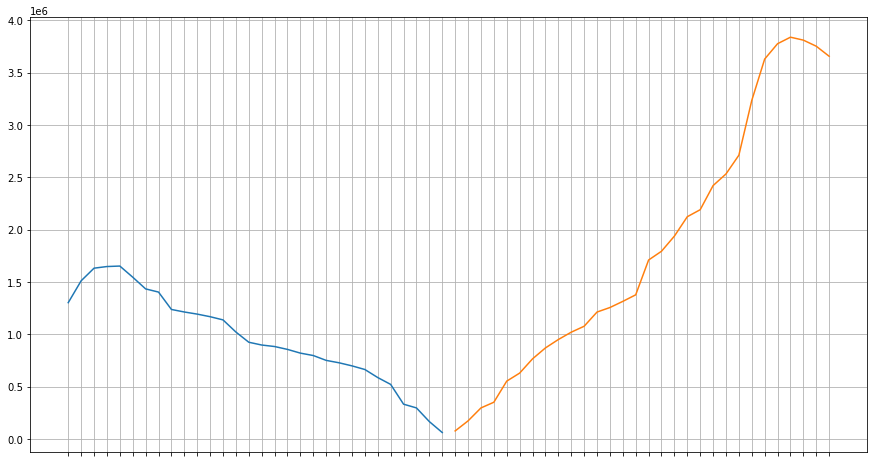

In [33]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(df.iloc[0, 2:32] * ldg1.iloc[0, :]))
ax.plot(df.iloc[0, 54:84] * ldg2.iloc[0, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Segunda Componente * OB1

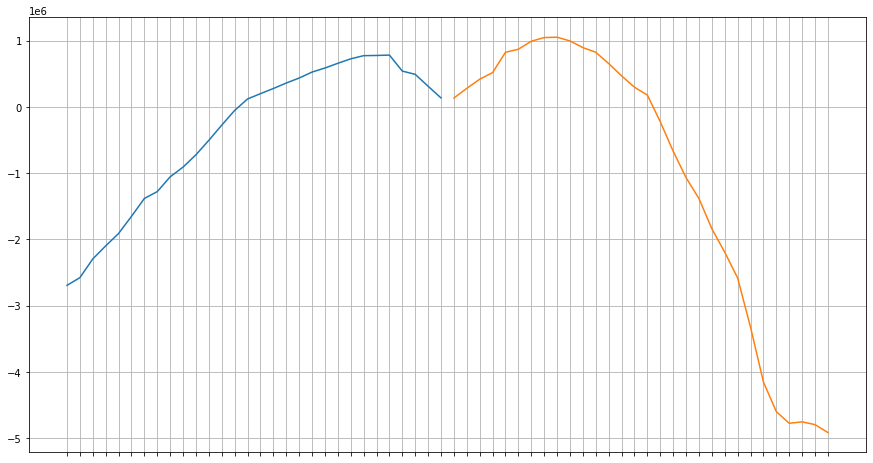

In [34]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(df.iloc[0, 2:32] * ldg1.iloc[1, :]))
ax.plot(df.iloc[0, 54:84] * ldg2.iloc[1, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

### OBC: Tercera Componente * OB1

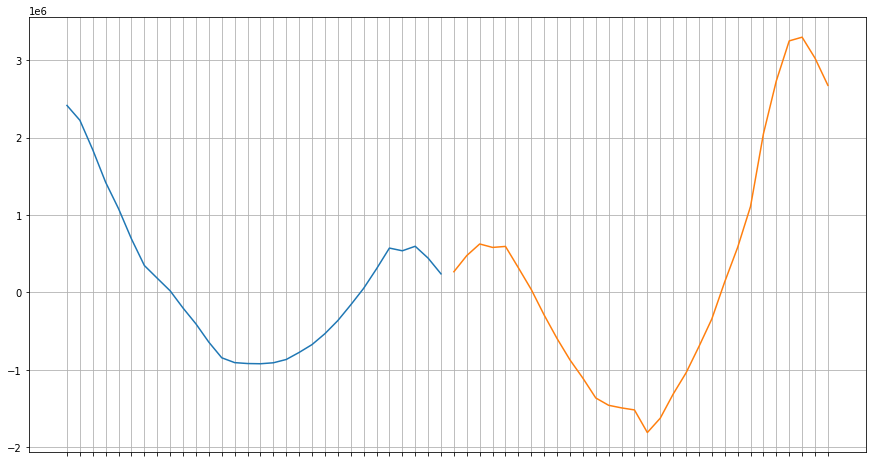

In [35]:
fig, ax = plt.subplots(figsize = (15, 8))
ax.plot(np.flip(df.iloc[0, 2:32] * ldg1.iloc[2, :]))
ax.plot(df.iloc[0, 54:84] * ldg2.iloc[2, :])
ax.grid()

labels = [item.get_text() for item in ax.get_xticklabels()]
empty_string_labels = ['']*len(labels)
ax.set_xticklabels(empty_string_labels);

## New DataFrame: bitcoin

In [36]:
dfBids = df.iloc[:, 2:32]
pca = PCA(n_components = 4)
pca.fit(dfBids)
dfBids = pd.DataFrame(pca.transform(dfBids), columns=['BidPCA%i' % i for i in range(1, 5)], index = dfBids.index).reset_index(drop = True)

dfAsks = df.iloc[:, 54:84]
pca = PCA(n_components = 4)
pca.fit(dfAsks)
dfAsks = pd.DataFrame(pca.transform(dfAsks), columns=['AskPCA%i' % i for i in range(1, 5)], index = dfAsks.index).reset_index(drop = True)

dfBidSlope = df.iloc[:, 34:49]
pca = PCA(n_components = 4)
pca.fit(dfBidSlope)
dfBidSlope = pd.DataFrame(pca.transform(dfBidSlope), columns=['BidSlopePCA%i' % i for i in range(1, 5)], index = dfBidSlope.index).reset_index(drop = True)

dfAskSlope = df.iloc[:, 86:101]
pca = PCA(n_components = 4)
pca.fit(dfAskSlope)
dfAskSlope = pd.DataFrame(pca.transform(dfAskSlope), columns=['AskSlopePCA%i' % i for i in range(1, 5)], index = dfAskSlope.index).reset_index(drop = True)

PCAVars = pd.concat([dfBids, dfAsks, dfBidSlope, dfAskSlope], axis = 1)

PCAVars.to_csv (r'C:\Users\victo\Desktop\UNIVERSIDAD\MASTER\TFM\datos\BTC_PCA_Vars.csv', index = False, header=True)

## New DataFrame: ethereum

In [39]:
df4 = pd.read_csv('datos/EthDatos4.csv')

# Eliminamos las variables de date
df4 = df4.iloc[:, 2:]

In [41]:
dfBids = df4.iloc[:, 0:30]
pca = PCA(n_components = 4)
pca.fit(dfBids)
dfBids = pd.DataFrame(pca.transform(dfBids), columns=['ETH_BidPCA%i' % i for i in range(1, 5)], index = dfBids.index).reset_index(drop = True)

dfAsks = df4.iloc[:, 45:75]
pca = PCA(n_components = 4)
pca.fit(dfAsks)
dfAsks = pd.DataFrame(pca.transform(dfAsks), columns=['ETH_AskPCA%i' % i for i in range(1, 5)], index = dfAsks.index).reset_index(drop = True)

dfBidSlope = df4.iloc[:, 30:45]
pca = PCA(n_components = 4)
pca.fit(dfBidSlope)
dfBidSlope = pd.DataFrame(pca.transform(dfBidSlope), columns=['ETH_BidSlopePCA%i' % i for i in range(1, 5)], index = dfBidSlope.index).reset_index(drop = True)

dfAskSlope = df4.iloc[:, 75:90]
pca = PCA(n_components = 4)
pca.fit(dfAskSlope)
dfAskSlope = pd.DataFrame(pca.transform(dfAskSlope), columns=['ETH_AskSlopePCA%i' % i for i in range(1, 5)], index = dfAskSlope.index).reset_index(drop = True)

ETHPCAVars = pd.concat([dfBids, dfAsks, dfBidSlope, dfAskSlope], axis = 1)

ETHPCAVars.to_csv (r'C:\Users\victo\Desktop\UNIVERSIDAD\MASTER\TFM\datos\ETH_PCA_Vars.csv', index = False, header=True)